In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
from qasvm.datasets import Toy2DLinearLoader, Sklearn_DataLoader, Toy2DXORLoader, ToyBlochSphereLoader
from qasvm.preprocessing import DataMultiScaler, DataScaler
from qasvm.classifier import BinarySVM
from qasvm.kernel import Kernel
from sklearn.datasets import make_circles, make_moons, load_breast_cancer
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
w = (1,1)
b = 1
kernel = Kernel('linear')
k = 100
C = 0.1


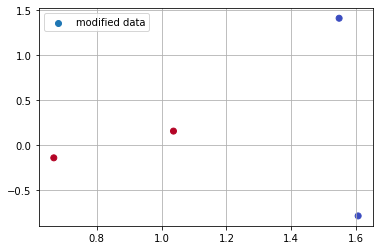

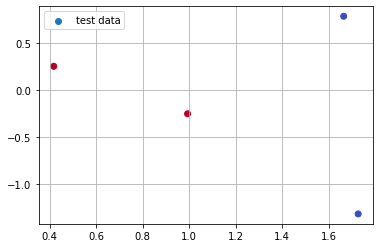

In [4]:
np.random.seed(50)
X, y = make_circles(100, noise=0.01)
Xt, yt = make_circles(100, noise=0.01)
dl = Toy2DLinearLoader(w, b)
dl = Toy2DXORLoader(-1/6, 1/2, 7/6)
dl = ToyBlochSphereLoader(gap=np.pi/8)
X, y = dl(4, 0.1)
Xt, yt = dl(4, 0.1)
ds = []
#ds.append(DataScaler('maxabs'))
#ds.append(DataScaler('standard', with_std=False))
#ds.append(DataScaler('normalize'))
#mds = DataMultiScaler(*ds)
#plt.scatter(X[:,0], X[:,1], marker='o', c=y, cmap=plt.cm.coolwarm, label='original data')
#X = mds(X)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, cmap=plt.cm.coolwarm, label='modified data')
plt.grid()
plt.legend()
plt.figure()
plt.scatter(Xt[:,0], Xt[:,1], marker='o', c=yt, cmap=plt.cm.coolwarm, label='test data')
plt.grid()
plt.legend()

In [5]:
svm11 = BinarySVM(Kernel('SingleQubit'), C=None, mutation='REDUCED_QASVM', k=0.1)
svm12 = BinarySVM(Kernel('SingleQubit'), C=1e2, mutation='REDUCED_QASVM', k=0.1)
svm21 = BinarySVM(Kernel('SingleQubit'), C=1e0, mutation='REDUCED_QASVM', k=0.1)
svm22 = BinarySVM(Kernel('SingleQubit'), C=1e-10, mutation='REDUCED_QASVM', k=0.1)

svms = [[svm11, svm12], [svm21, svm22]]
for i in range(2):
    for j in range(2):
        svms[i][j].fit(X, y)


1.0 optimal
1.0 optimal
1.0 optimal
0.5 optimal


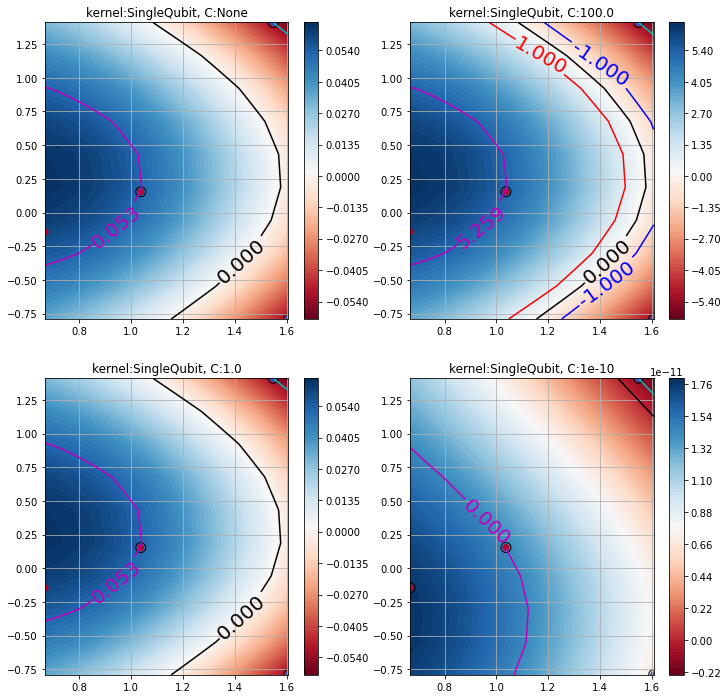

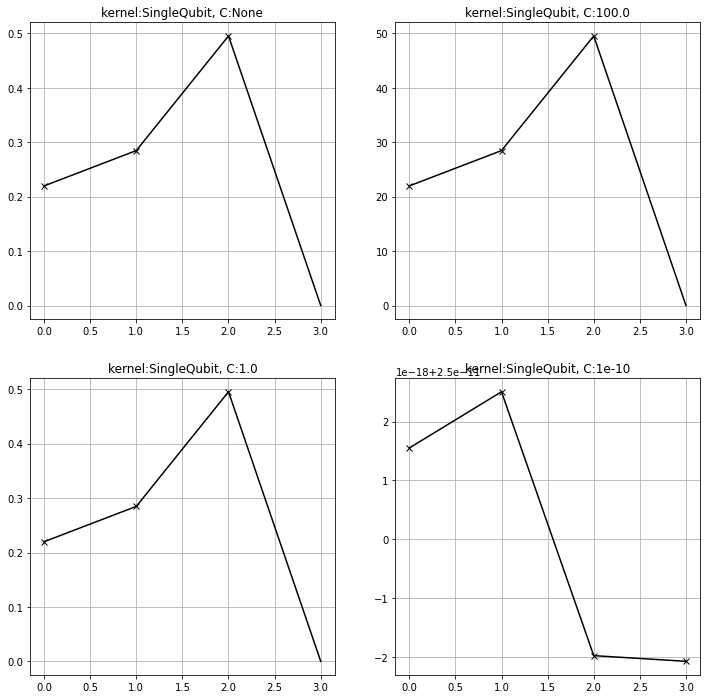

In [6]:
fig1, axes1 = plt.subplots(2, 2, figsize=(12, 12))
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    for j in range(2):
        svms[i][j].plot_boundary(ax=axes1[i][j], fig=fig1)
        axes1[i][j].set_title('kernel:{:}, C:{:}'.format(svms[i][j].kernel, svms[i][j].C))
        svms[i][j].plot('alpha', ax=axes2[i][j])
        axes2[i][j].set_title('kernel:{:}, C:{:}'.format(svms[i][j].kernel, svms[i][j].C))
        print(svms[i][j].accuracy(Xt, yt), svms[i][j].status)


In [10]:

from qiskit.aqua.components.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal, EfficientSU2
from qiskit.providers.aer import QasmSimulator
from qiskit.aqua import QuantumInstance
from qasvm.circuits.classifier import DualQASVM, OneLocal

qi = QuantumInstance(QasmSimulator(shots=1024))
opt = SLSQP()
feature_map = OneLocal()
var_form = EfficientSU2(2)
dataset = {'data':X, 'label':y}
qasvm = DualQASVM(opt, feature_map, var_form, dataset, None, qi)
qasvm.dual_qc.draw()



TypeError: Can't instantiate abstract class DualQASVM with abstract methods get_optimal_circuit, get_optimal_cost, get_optimal_vector, optimal_params

In [32]:
from qiskit import transpile
transpile(qasvm.dual_qc, basis_gates=['cx', 'rx', 'ry', 'rz'], optimization_level=3).depth()

482

In [33]:
qasvm = BlochSphereBinaryQASVM(opt, var_form, dataset, None, qi)
qasvm.dual_qc.draw()

┌───┐                                                              »
 a_0: ───┤ H ├──────────────────────────────────────────────────────────────»
      ┌──┴───┴───┐┌──────────┐     ┌──────────┐┌──────────┐     ┌──────────┐»
 i_0: ┤ RY(θ[0]) ├┤ RZ(θ[2]) ├──■──┤ RY(θ[4]) ├┤ RZ(θ[6]) ├──■──┤ RY(θ[8]) ├»
      ├──────────┤├──────────┤┌─┴─┐├──────────┤├──────────┤┌─┴─┐├──────────┤»
 i_1: ┤ RY(θ[1]) ├┤ RZ(θ[3]) ├┤ X ├┤ RY(θ[5]) ├┤ RZ(θ[7]) ├┤ X ├┤ RY(θ[9]) ├»
      └──────────┘└──────────┘└───┘└──────────┘└──────────┘└───┘└──────────┘»
 x_0: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 y_0: ──────────────────────────────────────────────────────────────────────»
      ┌──────────┐┌──────────┐     ┌──────────┐┌──────────┐     ┌──────────┐»
 j_0: ┤ RY(θ[0]) ├┤ RZ(θ[2]) ├──■──┤ RY(θ[4]) ├┤ RZ(θ[6]) ├──■──┤ RY(θ[8]) ├»
      ├──────────┤├──────────┤┌─┴─┐├──────────┤├──────────┤┌─┴─┐├──────────┤»
 j_1: ┤ RY(θ[1]) ├┤ RZ(θ[3]) ├┤ X ├┤ RY(θ[5]) ├┤ RZ(θ[7]) ├┤ X ├┤ RY(θ[9]) ├»
      └──────────┘└──────────┘└───┘└──────────┘└──────────┘└───┘└──────────┘»
xj_0: ──────────────────────────────────────────────────────────────────────»
                                                                            »
yj_0: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 c: 3/══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                  »
« a_0: ────────────────────────────────────────────────────────────»
«      ┌───────────┐     ┌───────────┐┌───────────┐┌──────────────┐»
« i_0: ┤ RZ(θ[10]) ├──■──┤ RY(θ[12]) ├┤ RZ(θ[14]) ├┤1             ├»
«      ├───────────┤┌─┴─┐├───────────┤├───────────┤│              │»
« i_1: ┤ RZ(θ[11]) ├┤ X ├┤ RY(θ[13]) ├┤ RZ(θ[15]) ├┤2 MULTIPLEXER ├»
«      └───────────┘└───┘└───────────┘└───────────┘│              │»
« x_0: ────────────────────────────────────────────┤0             ├»
«                                                  └──────────────┘»
« y_0: ────────────────────────────────────────────────────────────»
«      ┌───────────┐     ┌───────────┐┌───────────┐┌──────────────┐»
« j_0: ┤ RZ(θ[10]) ├──■──┤ RY(θ[12]) ├┤ RZ(θ[14]) ├┤1             ├»
«      ├───────────┤┌─┴─┐├───────────┤├───────────┤│              │»
« j_1: ┤ RZ(θ[11]) ├┤ X ├┤ RY(θ[13]) ├┤ RZ(θ[15]) ├┤2 MULTIPLEXER ├»
«      └───────────┘└───┘└───────────┘└───────────┘│              │»
«xj_0: ────────────────────────────────────────────┤0             ├»
«                                                  └──────────────┘»
«yj_0: ────────────────────────────────────────────────────────────»
«                                                                  »
« c: 3/════════════════════════════════════════════════════════════»
«                                                                  »
«                           ┌───┐┌─┐
« a_0: ───────────────────■─┤ H ├┤M├
«      ┌────────────────┐ │ └───┘└╥┘
« i_0: ┤1               ├─┼───────╫─
«      │                │ │       ║ 
« i_1: ┤2               ├─┼───────╫─
«      │  UCRX(π,π,0,0) │ │       ║ 
« x_0: ┤                ├─X───────╫─
«      │                │ │  ┌─┐  ║ 
« y_0: ┤0               ├─┼──┤M├──╫─
«      ├────────────────┤ │  └╥┘  ║ 
« j_0: ┤1               ├─┼───╫───╫─
«      │                │ │   ║   ║ 
« j_1: ┤2               ├─┼───╫───╫─
«      │  UCRX(π,π,0,0) │ │   ║   ║ 
«xj_0: ┤                ├─X───╫───╫─
«      │                │┌─┐  ║   ║ 
«yj_0: ┤0               ├┤M├──╫───╫─
«      └────────────────┘└╥┘  ║   ║ 
« c: 3/═══════════════════╩═══╩═══╩═
«                         2   1   0

In [34]:
qasvm.var_form.parameter_bounds

[(-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793),
 (-3.141592653589793, 3.141592653589793)]

In [35]:
qasvm.var_form.ordered_parameters

[Parameter(θ[0]),
 Parameter(θ[1]),
 Parameter(θ[2]),
 Parameter(θ[3]),
 Parameter(θ[4]),
 Parameter(θ[5]),
 Parameter(θ[6]),
 Parameter(θ[7]),
 Parameter(θ[8]),
 Parameter(θ[9]),
 Parameter(θ[10]),
 Parameter(θ[11]),
 Parameter(θ[12]),
 Parameter(θ[13]),
 Parameter(θ[14]),
 Parameter(θ[15])]

In [8]:
qasvm.optimizer

NameError: name 'qasvm' is not defined

In [16]:
from qiskit.circuit import ParameterVector
set(ParameterVector('a', 10))

{Parameter(a[0]),
 Parameter(a[1]),
 Parameter(a[2]),
 Parameter(a[3]),
 Parameter(a[4]),
 Parameter(a[5]),
 Parameter(a[6]),
 Parameter(a[7]),
 Parameter(a[8]),
 Parameter(a[9])}